In [23]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix
from scipy.sparse import (
    coo_matrix, save_npz, load_npz
)

In [14]:
def create_anndata_obj(spots_file, 
    segmentation_mask, 
    output_file,
    filter_data=True, 
    metric = 'quality_minimum', 
    write_h5ad = True,
    value= 0.5,
    convert_coords = True, 
    conversion_factor = 0.1625): 
    print('reading spots file')

    spots = pd.read_csv(spots_file)
    
    if filter_data==True:
        if metric == 'quality_minimum':
            spots_filtered = spots[spots[metric] > value]
        elif metric == 'quality_mean':
            spots_filtered = spots[spots[metric] > value]
        elif metric == 'distance': 
            spots_filtered = spots[spots[metric] < value]
         
    else: 
        spots_filtered = spots
    
    spots_filtered = spots_filtered[['target','xc','yc']]
    
    if convert_coords == True: 
        spots_filtered['x'] = spots_filtered['xc']/conversion_factor
        spots_filtered['y'] = spots_filtered['yc']/conversion_factor
    else: 
        spots_filtered['x'] = spots_filtered['xc']
        spots_filtered['y'] = spots_filtered['yc']
        
    spots_filtered = spots_filtered.rename(columns = {'target':'Gene'})
    spots_filtered = spots_filtered[['Gene','x','y']]
    spots_filtered = spots_filtered.dropna()
    
    coo = load_npz(segmentation_mask)
    print('load coo file')
    assinged = assign_spots_to_cells(coo.toarray(), spots_filtered)
    cells = get_object_info(coo.toarray())
    
    cells[0] = cells[0]+1
    print('assign spots to cells')
    assigned_filt = assinged[assinged.cell != 0]
    hm = assinged.groupby(['Gene','cell']).size().unstack(fill_value=0)
    if 0 in hm.columns:
        hm = hm.drop(columns = 0)

    an_sp = sc.AnnData(X=hm.T)
    cells[0]  = cells[0].astype(str)
    cells_filt = cells[cells[0].isin(list(an_sp.obs.index))]
    an_sp.obs = cells_filt
    an_sp.obs = an_sp.obs.drop(columns = 0)
    cells[0].astype(int)-1
    
    if write_h5ad == True:
        print('write h5ad')
        
        an_sp.write_h5ad(output_file)
    else: 
        print('not writing')
    
    return an_sp

In [31]:
from skimage import (
     color, feature, filters, measure, morphology, segmentation, util
)
import os
import pandas as pd
import numpy as np
import skimage.color
from scipy.sparse import coo_matrix
from scipy.sparse import load_npz, save_npz
from skimage.measure import label, regionprops
import scanpy as sc 
import matplotlib.pyplot as plt
from skimage.segmentation import watershed, expand_labels
from matplotlib.pyplot import rc_context
import matplotlib as mpl

import scanpy as sc
import numpy as np
from matplotlib.pyplot import rc_context
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
#import tangram as tg
import scanpy as sc
import pandas as pd
#import squidpy as sq
from math import ceil
# Show plots as part of the notebook

import io
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import numpy as np

import numpy as np
import scanpy as sc
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

def get_object_info(segementation_result):
    region_proporties = measure.regionprops(segementation_result)
    area = []
    index = []
    x = []
    y = []
    for i in range(len(measure.regionprops(segementation_result))):         
        centroid_intermediate = region_proporties[i].centroid
        centroid_intermediate = list(centroid_intermediate)
        area_intermediate = region_proporties[i].area    
        x.append(centroid_intermediate[1])
        y.append(centroid_intermediate[0])
        area.append(area_intermediate)
        index.append(i)    # create dataframe      
    cell_info = pd.DataFrame(index)
    cell_info['x'] = x
    cell_info['y'] = y
    cell_info['area'] = area
    return cell_info

def assign_spots_to_cells(segmentation_labels, spots):
    from scipy import ndimage as ndi    
    spots1 = spots[["y", "x"]]    
    cell_labels = ndi.map_coordinates(
          segmentation_labels,
          spots1.T,  # assuming spot coords has shape (n, 2)
          order=0,
          )
    spots["cell"] = cell_labels
    return spots

def Diff(li1, li2):
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))


def create_anndata_obj(spots_file, 
    segmentation_mask, 
    output_file,
    filter_data=True, 
    metric = 'quality_minimum', 
    write_h5ad = True,
    value= 0.5,
    convert_coords = True, 
    conversion_factor = 0.1625): 
    print('reading spots file')

    spots = pd.read_csv(spots_file)
    
    if filter_data==True:
        if metric == 'quality_minimum':
            spots_filtered = spots[spots[metric] > value]
        elif metric == 'quality_mean':
            spots_filtered = spots[spots[metric] > value]
        elif metric == 'distance': 
            spots_filtered = spots[spots[metric] < value]
         
    else: 
        spots_filtered = spots
    
    spots_filtered = spots_filtered[['target','xc','yc']]
    
    if convert_coords == True: 
        spots_filtered['x'] = spots_filtered['xc']/conversion_factor
        spots_filtered['y'] = spots_filtered['yc']/conversion_factor
    else: 
        spots_filtered['x'] = spots_filtered['xc']
        spots_filtered['y'] = spots_filtered['yc']
        
    spots_filtered = spots_filtered.rename(columns = {'target':'Gene'})
    spots_filtered = spots_filtered[['Gene','x','y']]
    spots_filtered = spots_filtered.dropna()
    
    coo = load_npz(segmentation_mask)
    print('load coo file')
    assinged = assign_spots_to_cells(coo.toarray(), spots_filtered)
    cells = get_object_info(coo.toarray())
    
    cells[0] = cells[0]+1
    print('assign spots to cells')
    assigned_filt = assinged[assinged.cell != 0]
    hm = assinged.groupby(['Gene','cell']).size().unstack(fill_value=0)
    if 0 in hm.columns:
        hm = hm.drop(columns = 0)

    an_sp = sc.AnnData(X=hm.T)
    cells[0]  = cells[0].astype(str)
    cells_filt = cells[cells[0].isin(list(an_sp.obs.index))]
    an_sp.obs = cells_filt
    an_sp.obs = an_sp.obs.drop(columns = 0)
    cells[0].astype(int)-1
    
    if write_h5ad == True:
        print('write h5ad')
        
        an_sp.write_h5ad(output_file)
    else: 
        print('not writing')
    
    return an_sp

def recluster_specific_cluster(anndata, 
                               to_cluster, 
                               rerun_umap = False, 
                               resolutions = [0.1,0.2,0.3,0.5]):
    import scanpy as sc
    
    to_cluster = [to_cluster]
    anndata_int = anndata[anndata.obs.cell_type.isin(to_cluster)]

    sc.pp.neighbors(anndata_int, n_neighbors=30, n_pcs=30)
    
    if rerun_umap == True:
        sc.tl.umap(anndata_int, min_dist=1)

    for i in resolutions:
        print('clustering at resolution: '+str(i))
        plt.rcdefaults()
        sc.tl.leiden(anndata_int, resolution =i, key_added = ("cell_type_" + str(i)))

        plt.rcdefaults()
        with rc_context({'figure.figsize': (10, 10), 'figure.dpi': 50}):
            sc.pl.umap(anndata_int, color = ("cell_type_"+str(i)),s=30,legend_loc='on data',legend_fontsize=20,legend_fontoutline=10)     
    return anndata_int


def plot_umap(anndata,
              color = 'cell_type',
              compute_umap=False, 
              n_neighbors=30, 
              n_pcs=30,
              min_dist=1,
              fig_size = (10, 10),
              fig_dpi = 50, 
              s=20,
              legend_loc='on data',
              legend_fontsize=15,
              legend_fontoutline=10
             ): 
    if compute_umap == True: 
        sc.pp.neighbors(anndata, n_neighbors=n_neighbors, n_pcs=n_pcs)
        sc.tl.umap(anndata, min_dist=min_dist)
    plt.rcdefaults()
    with rc_context({'figure.figsize': fig_size, 'figure.dpi': fig_dpi}):
        sc.pl.umap(anndata, color = (color),s=s,legend_loc=legend_loc,legend_fontsize=legend_fontsize,legend_fontoutline=legend_fontoutline, frameon = False, title = ' ')

def plot_marker_genes(anndata, 
                    cluster_label, 
                    method='t-test', 
                    key_added = "t-test",
                    n_genes=25, sharey=False, key = "t-test"):
    sc.tl.rank_genes_groups(anndata, cluster_label, method=method, key_added = key_added)
    plt.rcdefaults()
    sc.pl.rank_genes_groups(anndata, n_genes=n_genes, sharey=sharey, key = key_added)

def plot_clusters(anndata, 
                    clusters_to_map, 
                    broad_cluster,
                    cluster_label_type = int,
                    key='t-test', 
                    size = 0.5,
                    number_of_marker_genes = 10, 
                    sample_id_column = 'sample_id', 
                    dim_subplots = [3,3]
                 ): 
    mpl.rcParams['text.color'] = 'w'
    plt.style.use('dark_background')
    clusters_to_map = clusters_to_map
    cluster_class = {}
    marker_genes = {}
    for broad in sorted(list(anndata.obs[broad_cluster].unique())): 
        anndata_broad = anndata[anndata.obs[broad_cluster] == broad]
        print('  ')
        print(broad)

        for cluster in sorted(list(anndata_broad.obs[clusters_to_map].unique().astype(cluster_label_type))):
            print(cluster)
            genes = list(sc.get.rank_genes_groups_df(anndata_broad,group=str(cluster), key=key)['names'].head(number_of_marker_genes))
            print(*list(genes), sep = " ")
            spatial_int = anndata_broad[anndata_broad.obs[clusters_to_map] == str(cluster)]
            fig, axs = plt.subplots(dim_subplots[0],ceil(len(anndata_broad.obs[sample_id_column].unique())/dim_subplots[1]), figsize=(20, 10))
            fig.subplots_adjust(hspace = .5, wspace=.001)
            fig.suptitle('Cluster: '+str(cluster))
            axs = axs.ravel()
            for q, j in enumerate(sorted(list(anndata_broad.obs[sample_id_column].unique()))):
                spatial_celltypes_tag_ = spatial_int[spatial_int.obs[sample_id_column]==j]
                axs[q].plot((anndata[anndata.obs[sample_id_column] == j].obs.x), (anndata[anndata.obs[sample_id_column] == j].obs.y), marker='s', linestyle='', ms=size, color = 'grey', alpha = 0.2)
                axs[q].plot(spatial_celltypes_tag_.obs.x, spatial_celltypes_tag_.obs.y, marker='s', linestyle='', ms=size, color = 'yellow')#spatial_int.uns['leiden_0.4_colors'][0])
                axs[q].set_title(str(str(j)))
                axs[q].axis('scaled')
                axs[q].axis('off')
            plt.show()

def spatial_neighborhood(anndata,
                           cluster_label = 'leiden_0.5',
                           max_distance_allowed = 300, 
                           umap_dist = 1,
                           leiden_resolution = 0.2
                           ):
    distances_input=np.array([anndata.obs['x'],anndata.obs['y']])
    din=distances_input.transpose()
    distances=euclidean_distances(din, din)
    dist_df=pd.DataFrame(distances)
    max_distance_allowed=max_distance_allowed
    dist_binary=((dist_df<max_distance_allowed)*1)*((dist_df!=0)*1)
    np.sum(np.sum(dist_binary))
    dist_binary['name']=list(anndata.obs[cluster_label])
    distbinsum=dist_binary.groupby('name').sum()
    adata=sc.AnnData(distbinsum.transpose())
    adata.obs=anndata.obs
    sc.tl.umap(adata,min_dist=umap_dist)
    sc.tl.leiden(adata,resolution=leiden_resolution, key_added = 'local_neighborhood')
    return adata

def create_ann_tiles(sample_path, 
                     segmentation_folder = '/cell_segmentation/',
                    expand = True, 
                    expand_distance = 30, 
                    anndata_file_output = 'anndata.h5ad'):
    path = sample_path+segmentation_folder
    files = os.listdir(path)
    #seg_files = [k for k in files if 'tile' in k]
    #seg_files = [k for k in seg_files if '.npz' in k]
    tiles = pd.read_csv(sample_path+ "/preprocessing/ReslicedTiles/tilepos.csv", header = None)
    try: 
        spots = pd.read_csv(sample_path+'/decoded.csv').dropna()
    except: 
        spots = pd.read_csv(sample_path+'/spots_PRMC.csv').dropna()
    to_append = []

    for i in sorted(spots.fov.unique()):
        #try:
        tile_int = tiles.iloc[i]
        file_name = 'tile'+str(i+1)+'.npz'
        image = load_npz(path+file_name).toarray()
        if len(np.unique(image)) == 1: 
            continue
        else: 
            spots_filt = spots[spots.fov == i]

            if expand == True:
                expanded = expand_labels(image, expand_distance)
                cell_labels = label(expanded)
                cells = get_object_info(cell_labels)
            else: 
                cell_labels = label(image)
                cells = get_object_info(cell_labels)

            #print('#'+str(len(cells)))
            cells['cellid'] = cells[0]+1
            assigned = assign_spots_to_cells(cell_labels, spots_filt)
            assigned = assigned[['target', 'x','y','cell']]


            hm = assigned.groupby(['target','cell']).size().unstack(fill_value=0)
            hm = hm.drop(columns = 0)
            test = hm.T.reindex(hm.T.columns.union(spots.target.unique(), sort=False), axis=1, fill_value=0)
            an_sp = sc.AnnData(X=test)
            cells_filt = cells[cells['cellid'].astype(str).isin(list(an_sp.obs.index))]
            cells_filt['x'] = cells_filt['x']+tile_int[0]
            cells_filt['y'] = cells_filt['y']+tile_int[1]
            an_sp.obs = cells_filt
            #print(an_sp)
            an_sp.obs = an_sp.obs.drop(columns = 0)
            an_sp.obs['cellid_index'] = 'tile'+str(i+1)+'_'+an_sp.obs['cellid'].astype(str)
            an_sp.obs = an_sp.obs.set_index('cellid_index')
            to_append.append(an_sp)
            #except: 
            #    continue
            
    ad_concat = sc.concat(to_append)
    #sc.pp.filter_cells(ad_concat, min_counts=5)
    spatial = np.array(ad_concat.obs[['x','y']].astype('<f8'))
    ad_concat.obsm['spatial'] = spatial
    ad_concat.obsm['xy_loc'] = spatial
    ad_concat.write(sample_path+anndata_file_output)
    return  ad_concat
    
def concat_anndata(sample_anndata_list, 
                  anndata_name = 'annData_obj_expanded.h5ad'
                  ): 
    adsp_list = []
    for sample in sample_anndata_list: 
        print(sample + anndata_name)
        try:
            adsp = sc.read(sample + anndata_name)
            adsp.obs['sample_id'] = sample
            adsp_list.append(adsp)
        except:
            print('sample: ' + sample + anndata_name +' not found')
    adsp = sc.concat(adsp_list, index_unique=None, join='outer', fill_value=0)
    return adsp

def add_fov_number(spots_file, 
                   tile_pos_file,
                   new_file, 
                   tile_size = 2000, 
                   conversion_factor=0.1625, 
                   new_tile_column = 'fov_2000'): 
    spots = pd.read_csv(spots_file)
    tile_pos = pd.read_csv(tile_pos_file, header = None)
    
    spots['x_pixels'] = spots['xc']/0.1625
    spots['y_pixels'] = spots['yc']/0.1625
    
    df_list = []

    for i in tile_pos.index:
        cut_out_df = spots[(spots.x_pixels>x) & (spots.x_pixels<x+tile_size) & (spots.y_pixels>y) & (spots.y_pixels<y+tile_size)] 
        cut_out_df[new_tile_column] = i
        df_list.append(cut_out_df)
    
    df_to_write = pd.concat(df_list)
    return df_to_write
    

def pciseq_anndata(cellData_file, 
                  geneData_file, 
                  mostProbable_file, 
                    output, 
                  write_ann = True,
                  ): 
    
    import pandas as pd
    cellData = pd.read_json(cellData_file)
    geneData = pd.read_json(geneData_file)
    mostProbable = pd.read_csv(mostProbable_file)
    
    hm = geneData.groupby(['Gene','neighbour']).size().unstack(fill_value=0)
    hm = hm.drop(columns = 0)
    an_sp = sc.AnnData(X=hm.T)
    
    an_sp = an_sp[an_sp.obs.index.astype(int).isin(cellData.Cell_Num)]
    cellData_filt = cellData[cellData.Cell_Num.isin(an_sp.obs.index.astype(int))]
    an_sp.obs = cellData_filt
    an_sp.obs['MostProbableCellType'] = mostProbable['ClassName']
    an_sp.obs['Prob'] = mostProbable['Prob']
    if write_ann == True: 
        an_sp.write(output)
    return an_sp

def color_cells_gene_expression(ad, 
                     GOI = 'Cd74',
                     spot_size=100,
                     sample_id_col = 'sample_id', 
                     plot_black_background = False, 
                    cmap = 'turbo'):
    
    fig, axs = plt.subplots(3,ceil(len(ad.obs[sample_id_col].unique())/3), figsize=(20, 10))
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    plt.rcdefaults()
    if plot_black_background == True: 
        mpl.rcParams['text.color'] = 'w'
        plt.style.use('dark_background')
    else: 
        plt.rcdefaults()
    plt.suptitle('Expression of ' + GOI)
    for q, j in enumerate(sorted(list(ad.obs[sample_id_col].unique()))):
        sc.pl.spatial(ad[ad.obs[sample_id_col] == j],color=GOI,spot_size=spot_size,ax=axs[q],  show=False, title = j, cmap = cmap)
        axs[q].set_xticks([])
        axs[q].set_yticks([])
        axs[q].set_xlabel(' ')
        axs[q].set_ylabel(' ')
    plt.tight_layout(pad=3.0)
    plt.show()
    
def plot_all_clusters(ad, 
                     cluster = 'leiden',
                     spot_size=100,
                     sample_id_col = 'sample_id', 
                     plot_black_background = True):
    fig, axs = plt.subplots(3,ceil(len(ad.obs[sample_id_col].unique())/3), figsize=(20, 10))
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    plt.rcdefaults()
    if plot_black_background == True: 
        mpl.rcParams['text.color'] = 'w'
        plt.style.use('dark_background')
    else: 
        plt.rcdefaults()
    plt.suptitle('Spatial localization of ' + cluster)
    for q, j in enumerate(sorted(list(ad.obs[sample_id_col].unique()))):
        sc.pl.spatial(ad[ad.obs[sample_id_col] == j],color=cluster,spot_size=spot_size,ax=axs[q],  show=False, title = j, )
        axs[q].get_legend().remove()
        axs[q].set_xticks([])
        axs[q].set_yticks([])
        axs[q].set_xlabel(' ')
        axs[q].set_ylabel(' ')
    plt.tight_layout(pad=3.0)
    plt.show() 

def color_cells_gene_expression(ad, 
                     GOI = 'Cd74',
                     spot_size=100,
                     sample_id_col = 'sample_id', 
                     plot_black_background = False, 
                    cmap = 'turbo'):
    
    fig, axs = plt.subplots(3,ceil(len(ad.obs[sample_id_col].unique())/3), figsize=(20, 10))
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    plt.rcdefaults()
    if plot_black_background == True: 
        mpl.rcParams['text.color'] = 'w'
        plt.style.use('dark_background')
    else: 
        plt.rcdefaults()
    plt.suptitle('Expression of ' + GOI)
    for q, j in enumerate(sorted(list(ad.obs[sample_id_col].unique()))):
        sc.pl.spatial(ad[ad.obs[sample_id_col] == j],color=GOI,spot_size=spot_size,ax=axs[q],  show=False, title = j, cmap = cmap)
        axs[q].set_xticks([])
        axs[q].set_yticks([])
        axs[q].set_xlabel(' ')
        axs[q].set_ylabel(' ')
    plt.tight_layout(pad=3.0)
    plt.show()
     
     
def map_of_clusters(adata,key='leiden',clusters='all',size=8,background='white',figuresize=(10,7),save=None,format='pdf'):		

      #PARAMETERS TO MODIFY:		
     #-key: the terms in adata.obs that you want to plot		
     #-clusters:'all' for plotting all clusters in a single plot, 'individual': for plots of individual genes, or ['3','5'] (your groups		
     #          between square brackets to plot only some clusters		
     #-size: to change the size of your spots		
     #-background: to change the color of the background		
     #-figuresize: to specify the size of your figure		
     #-save: if you want to save your figure, give the PATH of the folder where you want to save it		
     #-format: specify the format in which you want to save your figure		
     try:		
         adata.obs[key]=adata.obs[key].astype(int)		
         colors=dict(zip(np.unique(adata.obs[key]),adata.uns[key+'_colors']))		
     except:		
         colors=dict(zip(np.unique(adata.obs[key]),adata.uns[key+'_colors']))		
     #cl.apply(lambda x: colors[x])		
     plt.rcParams['figure.facecolor'] = background		
     if clusters=='all':		
         cl=adata.obs[key]		
         plt.figure(figsize=figuresize)		
         figa=plt.scatter(x=adata.obs.X,y=adata.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)		
         plt.axis('off')		
         if not save==None:		
             plt.savefig(save +'/map_all_clusters_'+str(size)+'_'+background+'_'+key+'.'+format)		
     elif clusters=='individual':		
         cl=adata.obs[key]		
         for each in adata.obs[key].unique():		
             adatasub=adata[adata.obs[key]==each]		
             plt.figure(figsize=figuresize)		
             plt.scatter(x=adata.obs.X,y=adata.obs.Y,c='grey',s=size/5,linewidths=0, edgecolors=None)		
             cl=adatasub.obs[key]		
             plt.scatter(x=adatasub.obs.X,y=adatasub.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)		
             plt.axis('off')		
             plt.title('Group: '+ str(each))		
             if not save==None:		
                 plt.savefig(save +'/map_inidivdual_cluster_'+str(each)+'_'+str(size)+background+'_'+key+'.'+format)		
     else:		
         adatasub=adata[adata.obs[key].isin(clusters)]		
         plt.figure(figsize=figuresize)		
         plt.scatter(x=adata.obs.X,y=adata.obs.Y,c='grey',s=size/5,linewidths=0, edgecolors=None)		
         cl=adatasub.obs[key]		
         plt.scatter(x=adatasub.obs.X,y=adatasub.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)		
         plt.axis('off')		
         plt.legend()		
         if not save==None:		
                 s=''		
                 for element in clusters:		
                     s=s+str(element)		
                 print(s)		
                 plt.savefig(save +'/map_group_of_clusters_'+str(s)+'_'+str(size)+background+'_'+key+'.'+format)		
 #        plt.title('Group: '+ paste(clusters))		

def plot_specific_cluster(anndata, 
                    clusters_to_map, 
                    broad_cluster,
                    cluster, 
                    cluster_label_type = int,
                    key='t-test', 
                    size = 0.5,
                    number_of_marker_genes = 10, 
                    sample_id_column = 'sample_id', 
                    dim_subplots = [3,3]
                 ): 
    mpl.rcParams['text.color'] = 'w'
    plt.style.use('dark_background')
    clusters_to_map = clusters_to_map
    cluster_class = {}
    marker_genes = {}
    for broad in sorted(list(anndata.obs[broad_cluster].unique())): 
        anndata_broad = anndata[anndata.obs[broad_cluster] == broad]
        print('  ')
        genes = list(sc.get.rank_genes_groups_df(anndata_broad,group=str(cluster), key=key)['names'].head(number_of_marker_genes))
        print(*list(genes), sep = " ")
        spatial_int = anndata_broad[anndata_broad.obs[clusters_to_map] == str(cluster)]
        fig, axs = plt.subplots(dim_subplots[0],ceil(len(anndata_broad.obs[sample_id_column].unique())/dim_subplots[1]), figsize=(20, 10))
        fig.subplots_adjust(hspace = .5, wspace=.001)
        fig.suptitle('Cluster: '+str(cluster))
        axs = axs.ravel()
        for q, j in enumerate(sorted(list(anndata_broad.obs[sample_id_column].unique()))):
            spatial_celltypes_tag_ = spatial_int[spatial_int.obs[sample_id_column]==j]
            axs[q].plot((anndata[anndata.obs[sample_id_column] == j].obs.x), (anndata[anndata.obs[sample_id_column] == j].obs.y), marker='s', linestyle='', ms=size, color = 'grey', alpha = 0.2)
            axs[q].plot(spatial_celltypes_tag_.obs.x, spatial_celltypes_tag_.obs.y, marker='s', linestyle='', ms=size, color = 'yellow')#spatial_int.uns['leiden_0.4_colors'][0])
            axs[q].set_title(str(str(j)))
            axs[q].axis('scaled')
            axs[q].axis('off')
        plt.show()
        

In [51]:
paths=['F:/Processing/Region_1_Corrected/preprocessing/','F:/Processing/Region_2_Corrected/preprocessing/',
      'F:/Processing/Region_4_Corrected/preprocessing/','F:/Processing/Region_5_Corrected/preprocessing/',
      'F:/Processing/Region_6_Corrected/preprocessing/','F:/Processing/Region_7_Corrected/preprocessing/',
      'F:/Processing/Region_8_Corrected/preprocessing/','F:/Processing/Region_9_Corrected/preprocessing/',
      'F:/Processing/Region_10_Corrected/preprocessing/','F:/Processing/Region_11_Corrected/preprocessing/']

In [57]:
    I=plt.imread(outpath+ r"Stitched2DTiles\Base_1_stitched-5.tif")
    coo=csr_matrix(I)
    m, n, d = round(coo.toarray().shape[0], -3), round(coo.toarray().shape[1], -3), 200
    arr = np.empty((m, n), dtype=np.int)
    arr_view = arr.reshape(m // d, d, n // d, d)
    vals = np.arange(m // d * n // d).reshape(m // d, 1, n // d, 1)
    arr_view[:] = vals
    arr = arr.astype('uint32')
    arr_coo = coo_matrix(arr)
    arr_coo.todense()

matrix([[  0,   0,   0, ...,  19,  19,  19],
        [  0,   0,   0, ...,  19,  19,  19],
        [  0,   0,   0, ...,  19,  19,  19],
        ...,
        [580, 580, 580, ..., 599, 599, 599],
        [580, 580, 580, ..., 599, 599, 599],
        [580, 580, 580, ..., 599, 599, 599]], dtype=uint32)

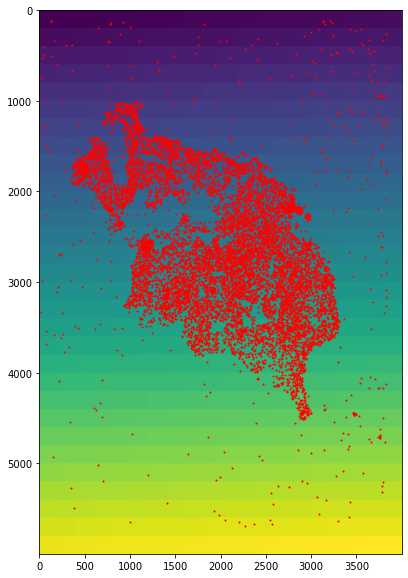

In [61]:
plt.figure(figsize=(10,10))
plt.imshow(arr_coo.todense())
cs=pd.read_csv(outpath+"/CARE/spots/DECODED_spots_PRMC_filt.csv")
plt.scatter(cs['xc'],cs['yc'],s=1,color='red')

In [62]:
for outpath in paths:
    I=plt.imread(outpath+ r"Stitched2DTiles\Base_1_stitched-5.tif")
    coo=csr_matrix(I)
    m, n, d = round(coo.toarray().shape[0], -3), round(coo.toarray().shape[1], -3), 200
    arr = np.empty((m, n), dtype=np.int)
    arr_view = arr.reshape(m // d, d, n // d, d)
    vals = np.arange(m // d * n // d).reshape(m // d, 1, n // d, 1)
    arr_view[:] = vals
    arr = arr.astype('uint32')
    arr_coo = coo_matrix(arr)
    arr_coo.todense()
    save_npz(outpath+'/stardist_segmentation_expanded.npz',arr_coo, compressed=True)
    adsp =create_anndata_obj(
    spots_file =outpath+"/CARE/spots/DECODED_spots_PRMC_filt.csv",
    segmentation_mask = outpath+'/stardist_segmentation_expanded.npz',
    output_file = outpath+ "/annData_200.h5ad",
    filter_data=False,
    metric = 'distance',
    write_h5ad = True,
    value= 1,
    convert_coords = False,
    conversion_factor =1
)

reading spots file
load coo file


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([40, 41], dtype='int64'), …
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([40, 41], dtype='int64'), …


assign spots to cells
write h5ad
reading spots file
load coo file


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 3], dtype='int64'), …
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 3], dtype='int64'), …


assign spots to cells
write h5ad
reading spots file
load coo file


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([22, 23], dtype='int64'), …
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([22, 23], dtype='int64'), …


assign spots to cells
write h5ad
reading spots file
load coo file


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


assign spots to cells
write h5ad
reading spots file
load coo file


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 2], dtype='int64'), …
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 2], dtype='int64'), …


assign spots to cells
write h5ad
reading spots file
load coo file


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([2, 6], dtype='int64'), …
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([2, 6], dtype='int64'), …


assign spots to cells
write h5ad
reading spots file
load coo file


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([83, 85], dtype='int64'), …
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([83, 85], dtype='int64'), …


assign spots to cells
write h5ad
reading spots file
load coo file


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([24, 28], dtype='int64'), …
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([24, 28], dtype='int64'), …


assign spots to cells
write h5ad
reading spots file
load coo file


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([7, 29], dtype='int64'), …
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([7, 29], dtype='int64'), …


assign spots to cells
write h5ad
reading spots file
load coo file


AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([2, 3], dtype='int64'), …
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([2, 3], dtype='int64'), …


assign spots to cells
write h5ad


In [53]:
adata=sc.read(outpath+ "/annData.h5ad")